In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd


In [2]:
with open('../../data/output/VERO/posterior_marginals.json', 'r') as f:
    marginals_json = json.load(f)

In [159]:

P0 = pd.DataFrame(marginals_json["b0"])
PMT = pd.DataFrame(marginals_json["bMT"])
PER = pd.DataFrame(marginals_json["bER"])
PFD = pd.DataFrame(marginals_json["bFD"])
rho = pd.DataFrame(marginals_json["rho"])
rho.columns = ["x", "y"]

sigma = pd.DataFrame(marginals_json["sigma"])
sigma.columns = ["x", "y"]


posteriors = [P0,PFD,PMT,PER,rho_int,sigma_int]
colors = ["lightgrey", "#09edecff", "#ec45f288","#767676cc","#3a78abff","#3a78abff"]

means = [-4.637, 2.919,-0.035, 0.121 ,19.54, 1.02]
modes = [ -4.628, 2.920,-0.035,0.121,18.270,0.994]
q0025 =  [-5.150, 2.247,-0.066,   0.026, 13.498,0.801  ] 
q0975 = [-4.176,3.588,-0.005,0.217,27.92,1.30]
labels = [r"$\mathrm{\beta_0}$",
          r"$\mathrm{\beta_{FD}}$",
          r"$\mathrm{\beta_{MT}}$",
         r"$\mathrm{\beta_{ER}}$",
         r"$\mathrm{\rho [\mu m]}$",
         r"$\mathrm{\sigma}$"]




                      mean    sd 0.025quant 0.5quant 0.975quant   mode kld
mitochondria        -0.035 0.016     -0.066   -0.035     -0.005 -0.035   0
er                   0.121 0.049      0.026    0.121      0.217  0.121   0
fractional.distance  2.919 0.341      2.247    2.920      3.588  2.920   0
Intercept           -4.637 0.247     -5.150   -4.628     -4.176 -4.628   0

Random effects:
  Name	  Model
    random.field SPDE2 model

Model hyperparameters:
                        mean    sd 0.025quant 0.5quant 0.975quant   mode
Range for random.field 19.54 3.677     13.498    19.14      27.92 18.270
Stdev for random.field  1.02 0.126      0.801     1.01       1.30  0.994

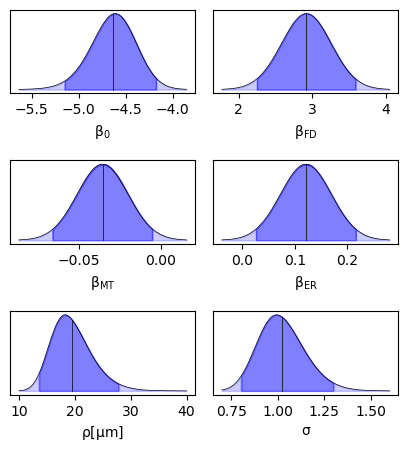

In [141]:


rows, cols = 3, 2

# Create the subplots
fig, axs = plt.subplots(rows, cols, figsize=(5, 5))
axs = axs.flatten()
plt.subplots_adjust( wspace=0.1, hspace=0.8)


for posterior,mean,ql,qh,ax,label in zip(posteriors,means,q0025,q0975,axs,labels):    
    indx_l = posterior["x"] <= ql
    indx_h = posterior["x"] >= qh
    indx_in = np.logical_and(~indx_l,~indx_h)
    mean_indx = np.abs(posterior["x"] - mean).argmin()

    ax.plot( posterior["x"], posterior["y"],color = "black",linewidth = 0.5)
    ax.fill_between(posterior["x"][indx_in], np.zeros_like(posterior["x"][indx_in]), posterior["y"][indx_in], color='blue', alpha=0.5,interpolate=True)
   
    ax.fill_between(posterior["x"][indx_l], np.zeros_like(posterior["x"][indx_l]), posterior["y"][indx_l], color='blue', alpha=0.2,interpolate=True)
    ax.fill_between(posterior["x"][indx_h], np.zeros_like(posterior["x"][indx_h]), posterior["y"][indx_h], color='blue', alpha=0.2)

    ax.plot([posterior["x"][mean_indx],posterior["x"][mean_indx]],[0,posterior["y"][mean_indx]],color = "black",linewidth = 0.5)
    ax.set_xlabel(label)
    ax.set_yticks([])


plt.savefig("../../figures/VERO/posteriors.pdf")

In [ ]:
plt.imshow(cell2)
plt.imshow(cell1)

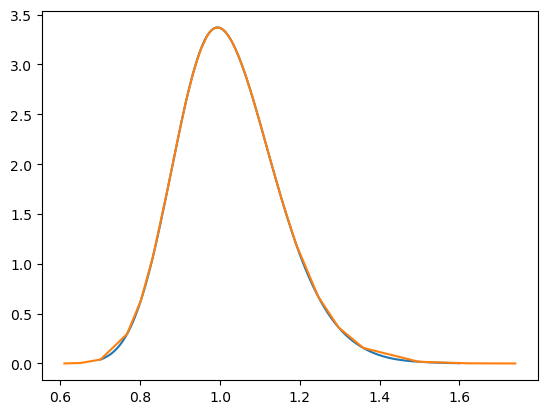

In [137]:
from scipy.interpolate import interp1d

interpolation_function = interp1d(sigma["x"], sigma["y"], kind='cubic')  # 'cubic' for cubic spline interpolation
x_new = np.linspace(0.7,1.6, num=200)
plt.plot(x_new,interpolation_function(x_new))
plt.plot(sigma["x"],sigma["y"])
sigma_int = {"x":x_new, "y":interpolation_function(x_new)}

r$\mathrm{\beta_0}$,
          $\mathrm{\beta_{MT}}$,
          "r$\mathrm{\beta_{ER}}$",
         "r$\mathrm{\beta_{FD}}$",
         "r$\mathrm{\rho[\mu m]}$",
         "r$\mathrm{\sigma}$"

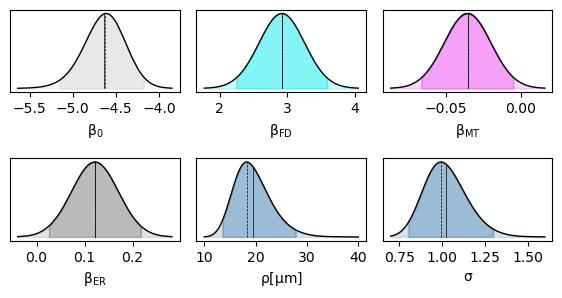

In [169]:
# 

posteriors = [P0,PFD,PMT,PER,rho_int,sigma_int]
colors = ["lightgrey", "#09edecff", "#ec45f288","#767676cc","#3a78abff","#3a78abff"]

means = [-4.637, 2.919,-0.035, 0.121 ,19.54, 1.02]
q0025 =  [-5.150, 2.247,-0.066,   0.026, 13.498,0.801  ] 
q0975 = [-4.176,3.588,-0.005,0.217,27.92,1.30]
labels = [r"$\mathrm{\beta_0}$",
          r"$\mathrm{\beta_{FD}}$",
          r"$\mathrm{\beta_{MT}}$",
         r"$\mathrm{\beta_{ER}}$",
         r"$\mathrm{\rho [\mu m]}$",
         r"$\mathrm{\sigma}$"]


rows, cols = 2, 3

# Create the subplots
fig, axs = plt.subplots(rows, cols, figsize=(7, 3))
axs = axs.flatten()
plt.subplots_adjust( wspace=0.1, hspace=0.8)


for posterior,mean,ql,qh,ax,label,color,mode in zip(posteriors,means,q0025,q0975,axs,labels,colors,modes):    
    indx_l = posterior["x"] <= ql
    indx_h = posterior["x"] >= qh
    indx_in = np.logical_and(~indx_l,~indx_h)
    mean_indx = np.abs(posterior["x"] - mean).argmin()

    mode_indx = np.abs(posterior["x"] - mode).argmin()

    ax.plot( posterior["x"], posterior["y"],color = "black",linewidth = 1)
    ax.fill_between(posterior["x"][indx_in], np.zeros_like(posterior["x"][indx_in]), posterior["y"][indx_in], color= color, alpha=0.5,interpolate=True)
   
    ax.fill_between(posterior["x"][indx_l], np.zeros_like(posterior["x"][indx_l]), posterior["y"][indx_l], color=color, alpha=0.2,interpolate=True)
    ax.fill_between(posterior["x"][indx_h], np.zeros_like(posterior["x"][indx_h]), posterior["y"][indx_h], color=color, alpha=0.2)
    ax.plot([posterior["x"][mean_indx],posterior["x"][mean_indx]],[0,posterior["y"][mean_indx]],color = "black",linewidth = 0.5)
    ax.plot([posterior["x"][mode_indx],posterior["x"][mode_indx]],[0,posterior["y"][mode_indx]],color = "black",linewidth = 0.5,linestyle = "--")

    ax.set_xlabel(label)
    ax.set_yticks([])

plt.savefig("../../figures/VERO/posteriors_colored.pdf")

TypeError: only integer scalar arrays can be converted to a scalar index